In [2]:
from opendrift.models.leeway import Leeway
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_global_landmask
from pprint import pprint

Det finnes mange modeller i opendrift. Her har eg brukt leeway (avdrift) siden det har egen type objekt for containere.
Mer info om leeway her https://opendrift.github.io/autoapi/opendrift/models/leeway/index.html#module-opendrift.models.leeway

In [3]:
o = Leeway(loglevel=50) #Loglevel er kor mye som ska printes ut i konsollen.
print(o)

15:35:44 DEBUG   opendrift.models.basemodel:618: Adding 17 config items from basemodel
15:35:44 DEBUG   opendrift.models.basemodel:618: Adding 4 config items from basemodel
15:35:44 DEBUG   opendrift.models.basemodel:618: Adding 10 config items from basemodel
15:35:44 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.5 / v0.10.5-5-gc81da7f)
15:35:44 DEBUG   opendrift.models.basemodel:618: Adding 2 config items from leeway
15:35:44 DEBUG   opendrift.models.basemodel:630:   Overwriting config item seed:jibe_probability


Model:	Leeway     (OpenDrift version 1.10.5)
	0 active LeewayObj particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
Readers not added for the following variables:
  land_binary_mask
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind



In [4]:
pprint(Leeway.required_variables)

{'land_binary_mask': {'fallback': None},
 'x_sea_water_velocity': {'fallback': None},
 'x_wind': {'fallback': None},
 'y_sea_water_velocity': {'fallback': None},
 'y_wind': {'fallback': None}}


Printene over viser ting som må vær med for at modellen ska fungere. Man får tak i disse gjennom en "reader". 

In [5]:
reader_norkyst = reader_netCDF_CF_generic.Reader(
    'https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be')

15:35:45 INFO    opendrift.readers.reader_netCDF_CF_generic:129: Opening dataset: https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be
15:35:47 DEBUG   opendrift.readers.reader_netCDF_CF_generic:146: Finding coordinate variables.
15:35:47 DEBUG   opendrift.readers.reader_netCDF_CF_generic:342: Skipped variables without standard_name: ['angle', 'tke', 'ubar', 'vbar']
15:35:47 DEBUG   opendrift.readers.basereader.variables:546: Setting buffer size 25 for reader https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be, assuming a maximum average speed of 5 m/s and time span of 1:00:00
15:35:47 DEBUG   opendrift.readers.basereader:168: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'] is not activated


Den over (reader_norkyst) virke som en bra. Kanskje me burde spør om anbefalinger fra bouvet. Under viser at den har mange av de nødvendige atributtene (alle utenom land_binary_mask). Me ser og at den har endtime fram i tid (ca 5 dager), så den kan brukes for prediksjoner

In [6]:
print(reader_norkyst.variables)
print(reader_norkyst.start_time)
print(reader_norkyst.end_time)

['sea_floor_depth_below_sea_level', 'latitude', 'longitude', 'x_wind', 'y_wind', 'sea_water_salinity', 'sea_water_temperature', 'x_sea_water_velocity', 'eastward_sea_water_velocity', 'y_sea_water_velocity', 'northward_sea_water_velocity', 'upward_sea_water_velocity', 'sea_surface_elevation']
2017-02-20 00:00:00
2023-02-19 00:00:00


Possible issue encountered when converting Shape #1541 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #1541 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


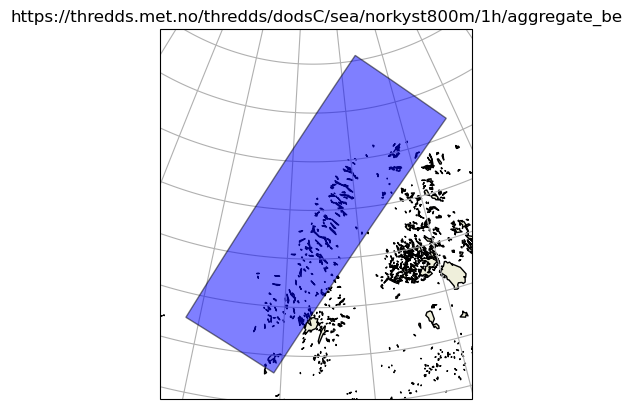

In [7]:
reader_norkyst.plot()

Får noe rar error, men den ska se sånn ut (Henta fra nettsiden deres) 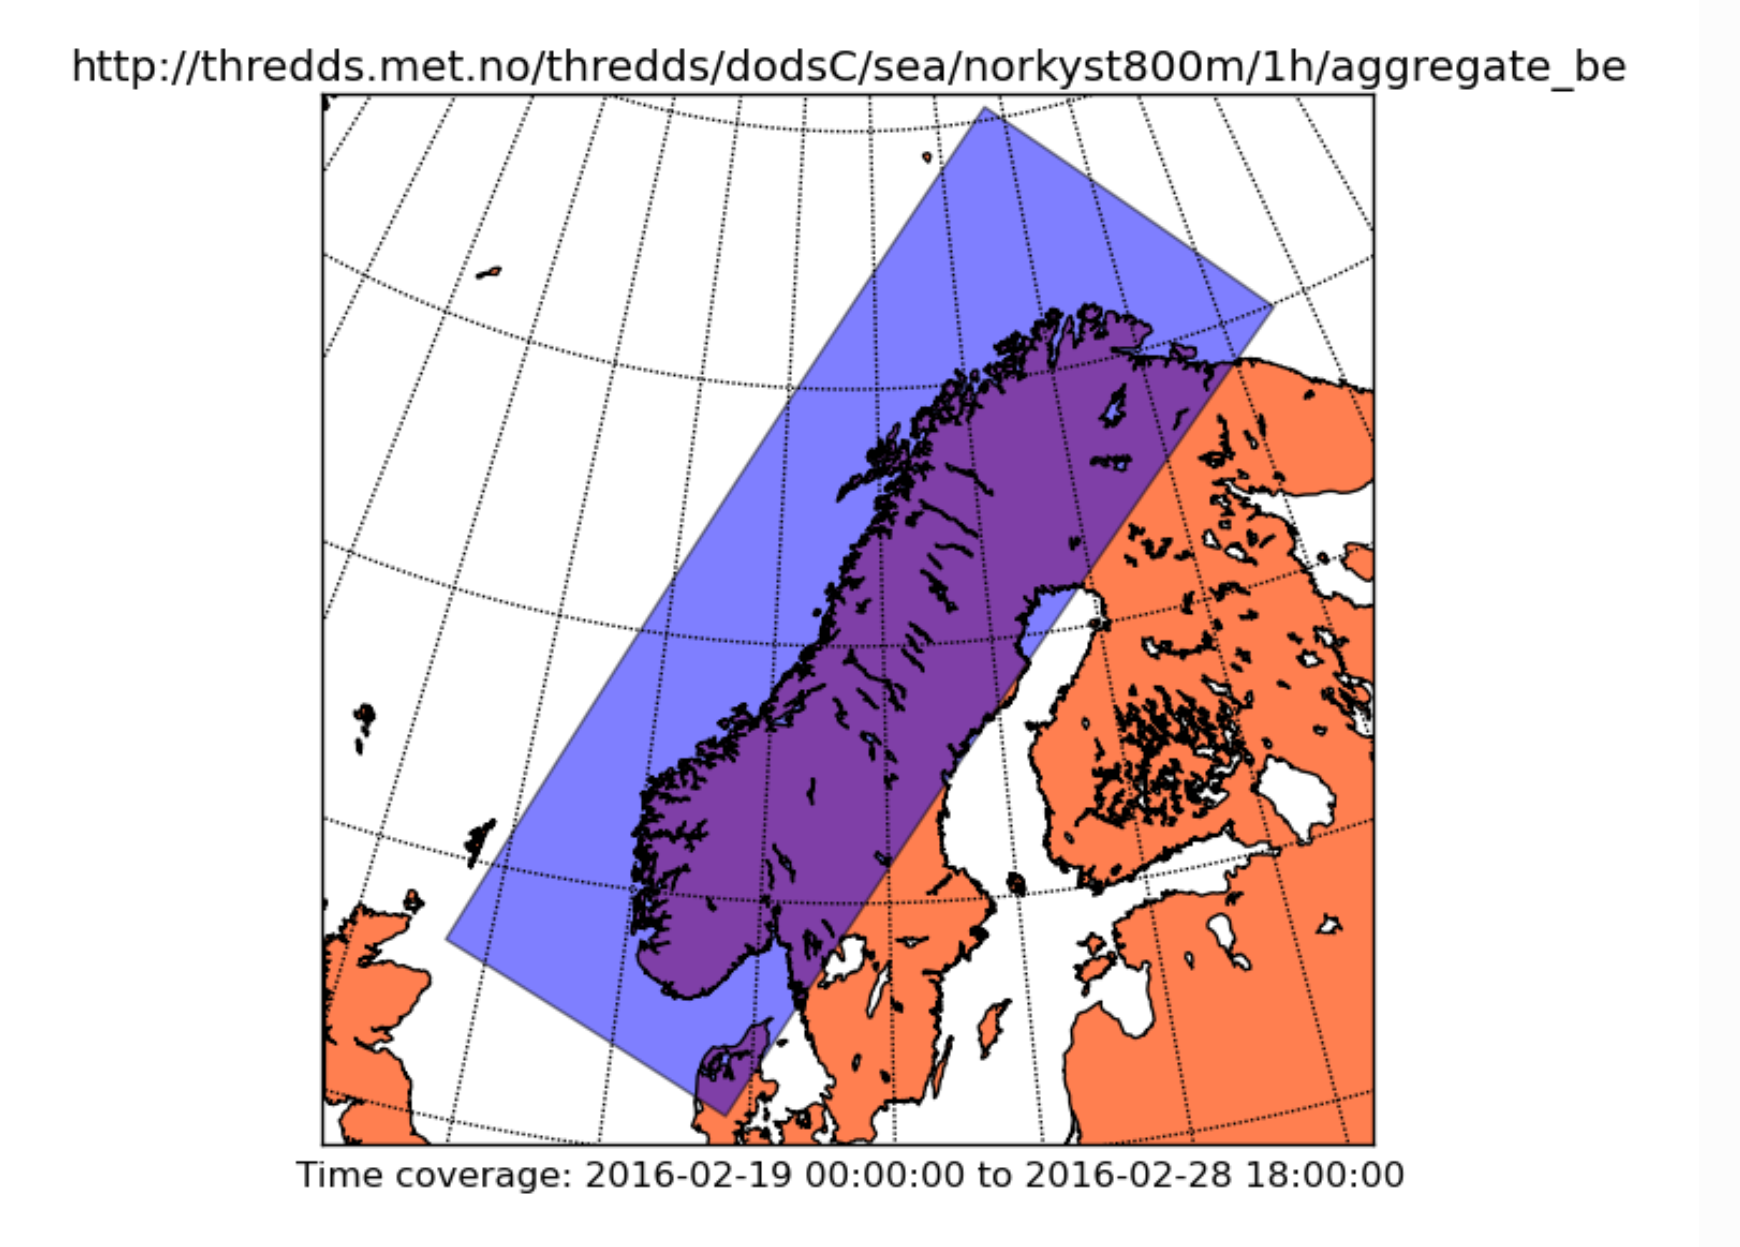

In [8]:
from opendrift.readers import reader_global_landmask
reader_landmask = reader_global_landmask.Reader()
print(reader_landmask)

15:35:49 DEBUG   opendrift.readers.basereader:168: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'] is not activated


Reader: global_landmask
Projection: 
  +proj=lonlat +ellps=WGS84
Coverage: [degrees]
  xmin: -180.000000   xmax: 180.000000
  ymin: -90.000000   ymax: 90.000000
  Corners (lon, lat):
    (-180.00,  90.00)  (180.00,  90.00)
    (-180.00, -90.00)  (180.00, -90.00)
Vertical levels [m]: 
  None
Available time range:
  start: None   end: None   step: None
Variables:
  land_binary_mask



Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #95 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #471 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included b

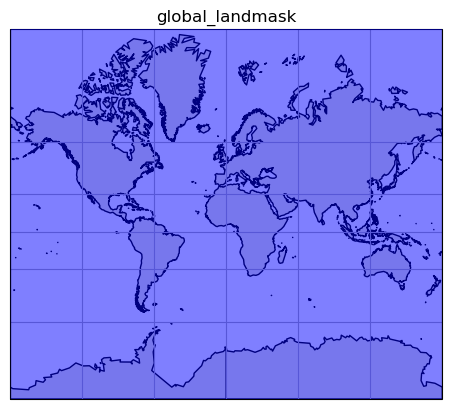

In [9]:
reader_landmask.plot()

Me har alt me trenge for å modellere og legge derfor til disse readersene.

In [10]:
o.add_reader([reader_landmask, reader_norkyst])

15:35:59 DEBUG   opendrift.models.basemodel:945: Added reader global_landmask
15:35:59 DEBUG   opendrift.readers.basereader.variables:546: Setting buffer size 25 for reader https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be, assuming a maximum average speed of 5 m/s and time span of 1:00:00
15:35:59 DEBUG   opendrift.models.basemodel:945: Added reader https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be


In [11]:
print(o)

Model:	Leeway     (OpenDrift version 1.10.5)
	0 active LeewayObj particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  land_binary_mask
     1) global_landmask
  -----
  x_sea_water_velocity
  x_wind
  y_sea_water_velocity
  y_wind
     1) https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be



Burde og se på laze readers for når me ska bruke dette i produksjon: https://opendrift.github.io/tutorial.html#lazy-readers

Siste å gjør før me kjøre modellen er å legge til element (kontainere). Dette kalles seeding.

Eg fant ut av rett object_type ved hjelp av dette:
The Leeway model is based on empirically determined coefficients as tabulated in https://github.com/OpenDrift/opendrift/blob/master/opendrift/models/OBJECTPROP.DAT
Sånn eg ser det så har me to valg for container. Dette er enten:

CONTAINER-1                 73
 Scaled down (1:3) 40-ft Container (70% submerged)
       1.78     1.44      2.99      0.27     -2.44      2.31     -0.27      2.44      2.31

CONTAINER-2                 74
 20-ft Container (80% submerged)
       1.25     3.96      2.81      0.19      1.14      4.36     -0.19     -1.14      4.36

Litt usikker på ka de tallene står for, men kanskje det er verdt å se inn i å endre de.

In [12]:
from datetime import datetime
#datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

o.seed_elements(lon=4.3, lat=60, object_type=74, time=datetime(2023,2,13,18,0,0))

15:35:59 INFO    opendrift.models.leeway:209: Seeding elements of object type 74: CONTAINER-2 (20-ft Container (80% submerged))


In [13]:
o.elements_scheduled

ID: [1]
status: [0.]
moving: 1
age_seconds: 0.0
origin_marker: 0
lon: [4.3]
lat: [60.]
z: 0.0
object_type: 74
orientation: [0]
jibe_probability: 0.04
downwind_slope: [1.25]
crosswind_slope: [0.19]
downwind_offset: [3.96]
crosswind_offset: [1.14]
downwind_eps: [4.956987]
crosswind_eps: [1.7446854]
current_drift_factor: 1.0

In [14]:
o.run()

15:35:59 DEBUG   opendrift.models.basemodel:2528: 
------------------------------------------------------
Software and hardware:
  OpenDrift version 1.10.5
  Platform: Windows, 10
  31.811737060546875 GB memory
  8 processors (Intel64 Family 6 Model 158 Stepping 9, GenuineIntel)
  NumPy version 1.24.2
  SciPy version 1.10.0
  Matplotlib version 3.6.3
  NetCDF4 version 1.6.2
  Xarray version 2023.2.0
  Python version 3.11.0 | packaged by conda-forge | (main, Oct 25 2022, 06:12:32) [MSC v.1929 64 bit (AMD64)]
------------------------------------------------------

15:35:59 DEBUG   opendrift.models.basemodel:2545: No output file is specified, neglecting export_buffer_length
15:35:59 INFO    opendrift.models.basemodel:2655: Duration, steps or end time not specified, running until end of first reader: None
15:35:59 INFO    opendrift.models.basemodel:2655: Duration, steps or end time not specified, running until end of first reader: 2023-02-19 00:00:00
15:35:59 DEBUG   opendrift.models.basem

In [15]:
print(o)

--------------------
Reader performance:
--------------------
global_landmask
 0:00:07.3  total
 0:00:00.0  preparing
 0:00:03.8  reading
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be
 0:02:42.6  total
 0:00:00.1  preparing
 0:01:14.8  reading
 0:00:11.9  interpolation
 0:00:02.6  interpolation_time
 0:01:25.8  rotating vectors
 0:00:00.0  masking
--------------------
Performance:
 4:23.9 total time
   15.6 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
   3:45.5 readers
       10.1 global_landmask
       23.8 postprocessing
 4:08.2 main loop
     2:48.5 https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be
      3.2 updating elements
    0.0 cleaning up
--------------------
Model:	Leeway     (OpenDrift version 1.10.5)
	0 active LeewayObj particles  (1 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  land_binary_mask
     1) global_landmask
  -----


15:42:33 DEBUG   opendrift.models.basemodel:3163: Setting up map: corners=None, fast=False, lscale=None
15:42:33 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: h, extent: (3.8411279678344727, 5.032947921752929, 59.8, 61.74283142089844)..
15:44:35 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: h, extent: (3.8411279678344727, 5.032947921752929, 59.8, 61.74283142089844)..
15:44:37 DEBUG   opendrift.readers.reader_global_landmask:83: Adding GSHHG shapes from cartopy, scale: h, extent: (3.8411279678344727, 5.032947921752929, 59.8, 61.74283142089844)..


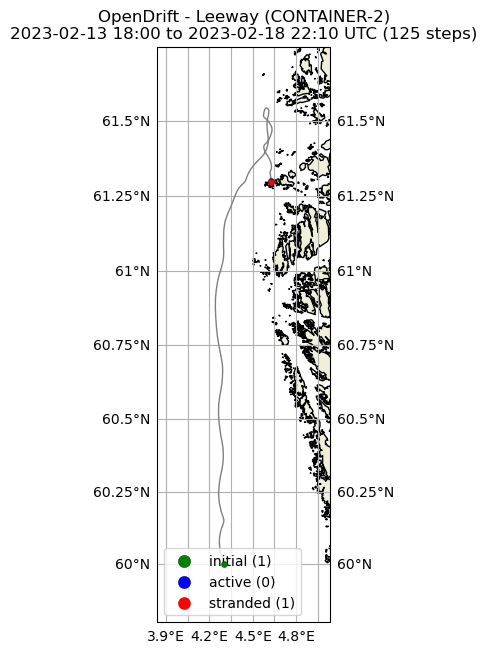

(<GeoAxesSubplot: title={'center': 'OpenDrift - Leeway (CONTAINER-2)\n2023-02-13 18:00 to 2023-02-18 22:10 UTC (125 steps)'}>,
 <Figure size 329.496x1100 with 1 Axes>)

In [16]:
o.plot()